# [실습] 이변량분석 종합실습

## 0.환경준비

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 숫자형 Y

## 보스톤 집값 데이터

![](https://ichi.pro/assets/images/max/724/0*3r3cqJ3Q875mQXVV)

|	변수	|	설명	|
|	----	|	----	|
|	medv	|	타운별 집값(중위수)	|
|	crim	|	범죄율	|
|	zn2	|	25,000 평방피트를 초과 거주지역 비율 (범주: 0-하, 1-중, 2-상)	|
|	indus	|	비소매상업지역 면적 비율	|
|	chas	|	찰스강변 위치(범주 : 강변1, 아니면 0)	|
|	nox	|	일산화질소 농도	|
|	rm	|	주택당 방 수	|
|	age	|	1940년 이전에 건축된 주택의 비율	|
|	dis	|	직업센터의 거리	|
|	rad	|	방사형 고속도로까지의 거리	|
|	tax	|	재산세율	|
|	ptratio	|	학생/교사 비율	|
|	black	|	인구 중 흑인 비율	|
|	lstat	|	인구 중 하위 계층 비율	|


In [2]:
boston = pd.read_csv('https://bit.ly/3EuWvZw')
boston.head()

,crim,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,zn2
0,0.00632,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
1,0.02731,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,0.03237,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
4,0.06905,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0


- target = 'medv'

### (1) 숫자형 X --> 숫자형 Y

* 시각화 : scatter, jointplot  
* 수치화 : 상관분석  
* 관계 평가

#### ① crim(범죄율) --> medv(집값)

1) 시각화 : scatter, jointplot 

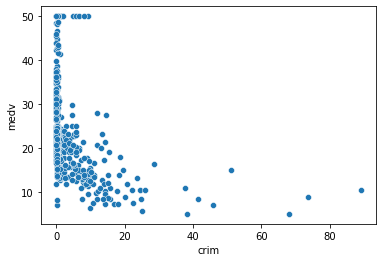

In [8]:
sns.scatterplot(x='crim', y='medv', data = boston)
plt.show()

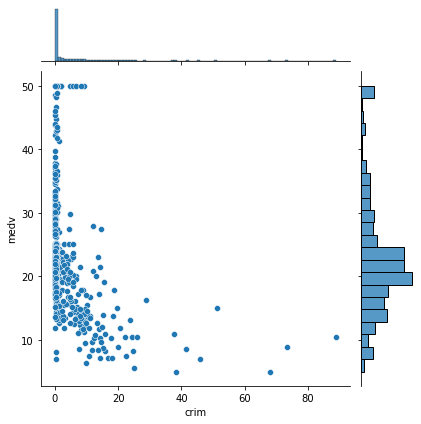

In [9]:
sns.jointplot(x='crim', y='medv', data = boston)
plt.show()

2) 수치화 : 상관분석

In [10]:
boston.corr()

,crim,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,zn2
crim,1.000000,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,-0.226508
indus,0.406583,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,-0.575822
chas,-0.055892,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,-0.053524
nox,0.420972,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,-0.538203
rm,-0.219247,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,0.315420
age,0.352734,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,-0.574508
dis,-0.379670,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,0.702343
rad,0.625505,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,-0.341151
tax,0.582764,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,-0.364646
ptratio,0.289946,0.383248,-0.121515,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044,-0.507787,-0.440774


In [26]:
# 상관계수
import scipy.stats as spst
print(spst.pearsonr(boston['crim'] ,boston['medv']))

print('상관계수:', spst.pearsonr(boston['crim'] ,boston['medv'])[0])
print('p-value:', spst.pearsonr(boston['crim'] ,boston['medv'])[1])

(-0.3883046085868116, 1.1739870821941207e-19)
상관계수: -0.3883046085868116
p-value: 1.1739870821941207e-19


p-value가 어떻게 나왔지?  
- 직선에 모여있냐?
- 직선으로 설명이 잘 되냐?

3) 관계 평가하기

→ 범죄율이 낮을 수록 집값이 높지 않을까? 라고 생각하고 분석을 해보았다.  

→ p-value 가 0.05보다 작기 때문에 crim(범죄율) 과 medv(집값) 관련이 있다.  
하지만 그래프 모양으로 보아 쪼개서 분석을 해야 할 필요가 있어보인다.

- 범죄율에 따라서 집값은 차이가 있다. (중간)

4) 추가 분석할 내용 정리

medv(집값) 산점도 그래프에서 40을 기준으로 2개의 그래프가 나오는 것을 나눠서 확인해볼 필요가 있다.

- 범죄율 거의 0%에 밀집되어 있는 타운들의 추가분석이 필요하다.

#### ② ptratio(교사학생 비율) --> medv(집값)

1) 시각화 : scatter, jointplot 

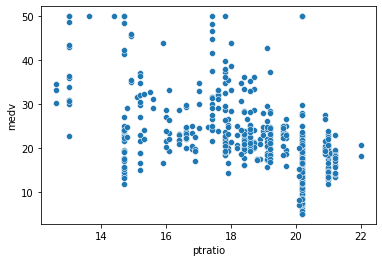

In [12]:
sns.scatterplot(x='ptratio', y='medv', data = boston)
plt.show()

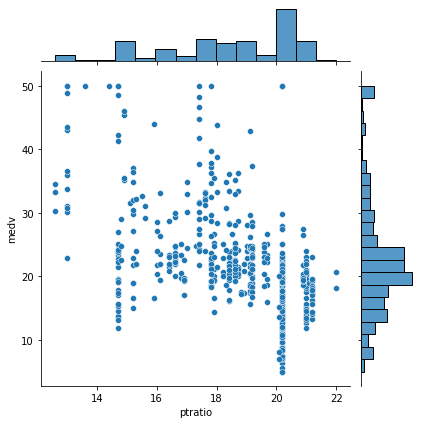

In [15]:
sns.jointplot(x='ptratio', y='medv', data = boston)
plt.show()

2) 수치화 : 상관분석

In [27]:
# 상관계수
import scipy.stats as spst
print(spst.pearsonr(boston['ptratio'] ,boston['medv']))

print('상관계수:', spst.pearsonr(boston['ptratio'] ,boston['medv'])[0])
print('p-value:', spst.pearsonr(boston['ptratio'] ,boston['medv'])[1])

(-0.507786685537562, 1.609509478472518e-34)
상관계수: -0.507786685537562
p-value: 1.609509478472518e-34


3) 관계 평가하기

그래프를 보고 교사1인당 학생수의 비율이 집값과 연관이 있어보였지만  
p-value가 0.05보다 작기 때문에 관련이 있다라는 결과가 나왔다.

- 교사학생비율과 집값은 관계가 있다. (강한 관계)

4) 추가 분석할 내용 정리

ptratio가 20에 주로 몰려있는데 이것을 기준으로 잘라서 추가 분석할 필요가 있다

- 교사학생비율을 3가지 범주로 구분해서 분석해 보면 좋겠다. 
- 범주의 특성을 파악 할 필요가 있다.(= 각각에 타운에 속한 특징을 볼 필요가 있다.)

#### ③ lstat(하위계층 비율) --> medv(집값)

1) 시각화 : scatter, jointplot 

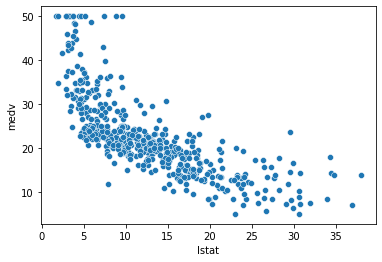

In [20]:
sns.scatterplot(x='lstat', y='medv', data = boston)
plt.show()

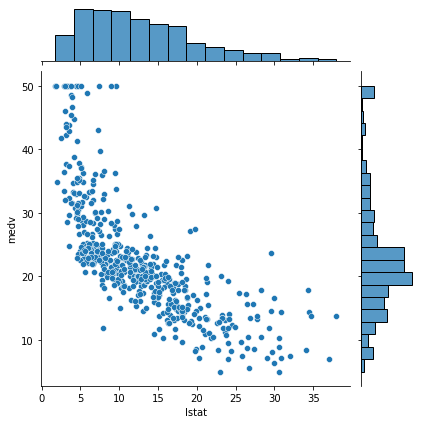

In [21]:
sns.jointplot(x='lstat', y='medv', data = boston)
plt.show()

2) 수치화 : 상관분석

In [28]:
# 상관계수
import scipy.stats as spst
print(spst.pearsonr(boston['lstat'] ,boston['medv']))

print('상관계수:', spst.pearsonr(boston['lstat'] ,boston['medv'])[0])
print('p-value:', spst.pearsonr(boston['lstat'] ,boston['medv'])[1])

(-0.7376627261740148, 5.08110339438697e-88)
상관계수: -0.7376627261740148
p-value: 5.08110339438697e-88


3) 관계 평가하기

그래프를 보니 음의 관계가 있어보인다.  
p-value가 0.05보다 작아서 관계가 있다는 결과가 나왔다.

- 하위계층 비율에 따라 집값은 차이가 있다. (강한 관계)

4) 추가 분석할 내용 정리

medv(집값) 변수를 40정도? 기준으로 쪼개서 분석해보면 더 정확할꺼같다

#### ④ indus(비소매상업지역 면적 비율) --> medv(집값)

1) 시각화 : scatter, jointplot 

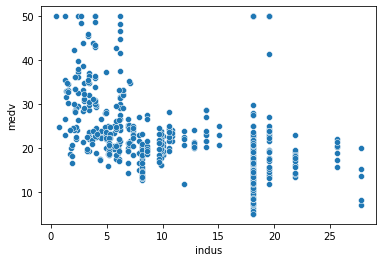

In [23]:
sns.scatterplot(x='indus', y='medv', data = boston)
plt.show()

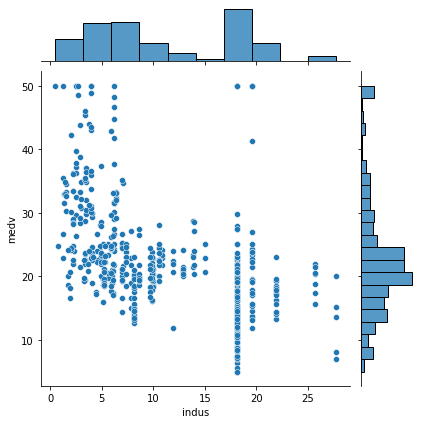

In [24]:
sns.jointplot(x='indus', y='medv', data = boston)
plt.show()

2) 수치화 : 상관분석

In [29]:
spst.pearsonr(boston['indus'], boston['medv'])

print('상관계수:', spst.pearsonr(boston['indus'] ,boston['medv'])[0])
print('p-value:', spst.pearsonr(boston['indus'] ,boston['medv'])[1])

상관계수: -0.4837251600283729
p-value: 4.900259981751351e-31


3) 관계 평가하기

그래프에서는 indus(비소매상업지역 면적 비율) 과 medv(집값) 관계가 있어 보인다.  
p-value는 0.05보다 작으므로 관계가 있다.

4) 추가 분석할 내용 정리

indus(비소매상업지역 면적 비율) 이 18?정도를 기준으로 쪼개서 자세히 살펴 볼 필요가 있다.

#### ⑤ nox(일산화질소 농도) --> medv(집값)

In [217]:
target = 'medv'

In [48]:
feature = 'nox'

1) 시각화 : scatter, jointplot 

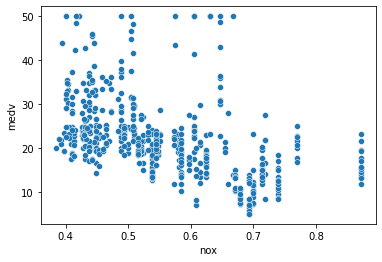

In [50]:
sns.scatterplot(x=feature, y=target, data = boston)
plt.show()

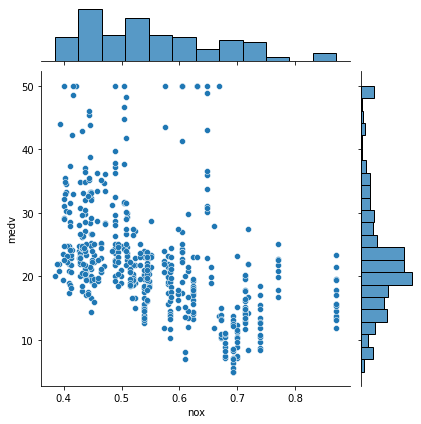

In [51]:
sns.jointplot(x = feature, y = target, data = boston)
plt.show()

2) 수치화 : 상관분석

In [52]:
spst.pearsonr(boston[feature], boston[target])

print('상관계수:', spst.pearsonr(boston[feature] ,boston[target])[0])
print('p-value:', spst.pearsonr(boston[feature] ,boston[target])[1])

상관계수: -0.4273207723732826
p-value: 7.065041586251507e-24


3) 관계 평가하기

- 일산화탄소 농도에 따라 집값에 차이가 있다. (중간 관계)

#### ⑥ tax(재산세율) --> medv(집값)

In [218]:
feature = 'tax'

1) 시각화 : scatter, jointplot 

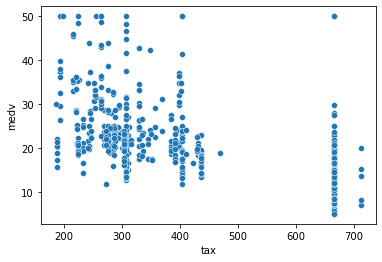

In [219]:
sns.scatterplot(x=feature, y=target, data = boston)
plt.show()

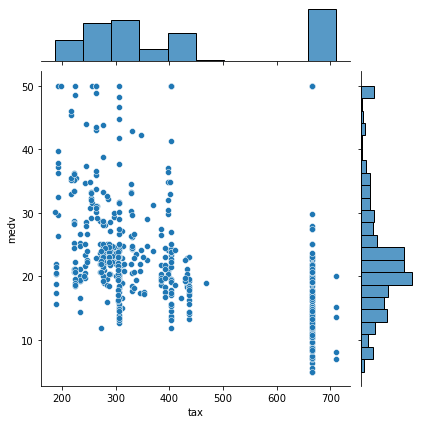

In [55]:
sns.jointplot(x = feature, y = target, data = boston)
plt.show()

2) 수치화 : 상관분석

In [220]:
spst.pearsonr(boston[feature], boston[target])

print('상관계수:', spst.pearsonr(boston[feature] ,boston[target])[0])
print('p-value:', spst.pearsonr(boston[feature] ,boston[target])[1])

상관계수: -0.4685359335677671
p-value: 5.637733627689083e-29


3) 관계 평가하기

- 재산세율과 집값은 관계가 있다. (중간관계)

4) 추가 분석할 내용 정리

- 재산세율이 ~ 50, 670 ~ 두 구간으로 나뉨.→  450 ~ 670 사이 구간은 값이 없음~ 왜?
- 재산세율 670정도에 타운들이 몰려있음 왜?

#### ⑦ rm(주택당 방 수)  --> medv(집값)

In [57]:
feature = 'rm'

1) 시각화 : scatter, jointplot 

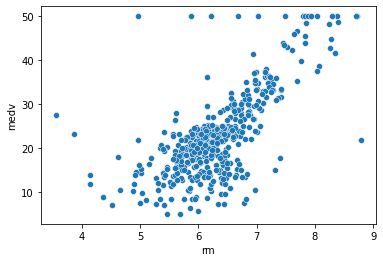

In [58]:
sns.scatterplot(x=feature, y=target, data = boston)
plt.show()

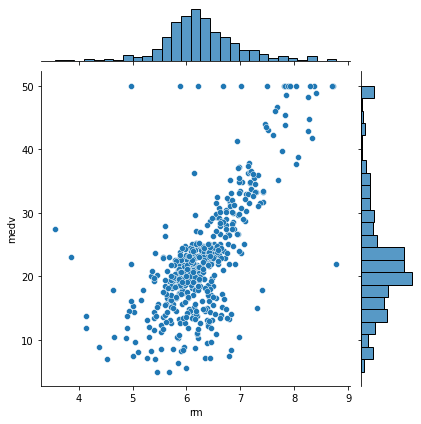

In [59]:
sns.jointplot(x = feature, y = target, data = boston)
plt.show()

2) 수치화 : 상관분석

In [60]:
spst.pearsonr(boston[feature], boston[target])

print('상관계수:', spst.pearsonr(boston[feature] ,boston[target])[0])
print('p-value:', spst.pearsonr(boston[feature] ,boston[target])[1])

상관계수: 0.6953599470715394
p-value: 2.4872288710071593e-74


3) 관계 평가하기

- 방수에 따라 집값은 달라진다. (강한 상관관계)

### (2) 범주형 X --> 숫자형 Y

* 시각화 : 평균비교 barplot
* 수치화 : t-test, anova
* 관계 평가

#### ① chas(찰스강변) --> medv(집값)

In [227]:
boston.loc[boston['chas']==0, 'medv'].mean()

22.093842887473482

1) 시각화 : 평균비교 barplot

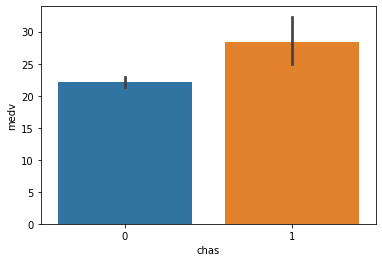

In [30]:
sns.barplot(x='chas', y='medv', data = boston)
plt.show()

신뢰구간이 넓게 나온 이유?  
- 데이터가 적거나   
-편차가 크거나

2) 수치화 : t-test

In [38]:
chas_0 = boston.loc[boston['chas']==0, 'medv']
chas_1 = boston.loc[boston['chas']==1, 'medv']

In [39]:
spst.ttest_ind(chas_0, chas_1)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

3) 관계 평가하기

- barplot으로 확이해봤을 때는 **가운데 그어진 작대기(=신뢰구간)** 차이가 난다.  
- 범주가2개 이기 때문에 t-test를 실시한 결과,  
p-value가 0.05보다 작아 chas(찰스강변)과 medv(집값) 관계가 있다.

- 찰스강변 여부에 따라 집값은 관계가 있다. (중간)

#### ② zn2(대저택 비율 범주, 0,1,2) --> medv(집값)  
zn2 : 25,000 평방피트를 초과 거주지역 비율 (범주: 0-하, 1-중, 2-상)

1) 시각화 : 평균비교 barplot

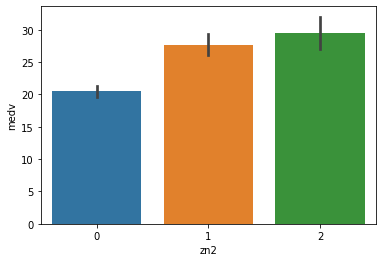

In [40]:
sns.barplot(x='zn2', y='medv', data = boston)
plt.show()

→ 전체평균대비 각각의 평균차이가 커보인다.

2) 수치화 : anova

In [42]:
zn2_0 = boston.loc[boston['zn2']==0, 'medv']
zn2_1 = boston.loc[boston['zn2']==1, 'medv']
zn2_2 = boston.loc[boston['zn2']==2, 'medv']

In [43]:
spst.f_oneway(zn2_0, zn2_1, zn2_2)

F_onewayResult(statistic=41.56175654117286, pvalue=1.9727794047741185e-17)

3) 관계 평가하기

- barplot으로 확이해봤을 때는 **가운데 그어진 작대기(=신뢰구간)** 차이가 조금 난다.  
- 범주가 3개 이상 이기 때문에 anova(분산분석)을 실시한 결과,  
p-value가 0.05보다 작기 때문에, zn2(대저택 비율 범주, 0,1,2) 과 edv(집값)은 관계가 있다.

- zn2(대저택 비율 범주, 0,1,2) 과 edv(집값)은 관계가 있다.(강한관계)

### (3) 관계 정리하기

① 강한관계

lstat, ptratio, zn2, rm, ...

② 중간관계

crim, chas

③ 관계없음

- 불필요 변수로 성능 저하
-> 선형회귀, 로지스틱회기, knn

- 불필요 변수 상관없는 알고리즘
-> tree
-> 딥러닝

# 범주형 Y

## 신용도 분석 데이터 : 심화


![](https://storage.googleapis.com/kaggle-datasets-images/310/684/3503c6c827ca269cc00ffa66f2a9c207/dataset-cover.jpg)

|	칼럼명	|	설명	|	값 설명	|
|	----	|	----	|	----	|
|	Creditability	|	신용도	|	0 : 나쁜 신용도, 1 : 좋은 신용도|
|	AccountBalance	|	은행잔고	|	1: No account, 2 : None (No balance), 3 : Some Balance	|
|	Employment	|	현 직업 근무 기간	|	1: Unemployed, 2: <1 Year, 3: [1, 4), 4: [4, 7), 5: Above 7|
|	SexMarital	|	성별 & 결혼상태	|	1: Male, Divorced, 2: Male, Single , 3: Male, Married/Widowed , 4: Female	|
|	CurrentAddress	|	현 거주지 거주기간	|1: <1 Year , 2: [1, 4) , 3: [4, 7) , 4: Above 7	|
|CreditDuration	|신청한 대출기간(월)|	숫자|
|CreditAmount |	신청한 대출금액	||
|Age|	나이||

In [102]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/credit_NA.csv"
usecols = ['Creditability','AccountBalance','Employment','SexMarital','CurrentAddress','CreditDuration','CreditAmount', 'Age']
credit = pd.read_csv(path, usecols=usecols)
credit.head()

,Creditability,AccountBalance,CreditDuration,CreditAmount,Employment,SexMarital,CurrentAddress,Age
0,1,3,24,1249,2,4,2,28.0
1,1,2,9,276,3,4,4,22.0
2,1,1,18,1049,2,2,4,21.0
3,1,1,24,6419,5,2,4,NaN
4,1,3,12,1424,5,2,4,55.0


In [103]:
target = 'Creditability'

### (1) 숫자형 X --> 범주형 Y

* 그래프 : histogram, densityplot
* 수치화 : 로지스틱회귀  
* 관계 평가

In [169]:
# 신용도가 높은 사람의 비율
credit[target].mean() # 0.7

0.7

#### ① Age(나이) --> Creditability(신용도)

In [171]:
feature = 'Age'

1) 그래프 : histogram, densityplot

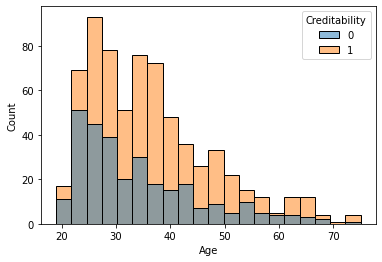

In [174]:
# 양보기
sns.histplot(x = feature, data = credit, bins = 20, hue = target)
plt.show()

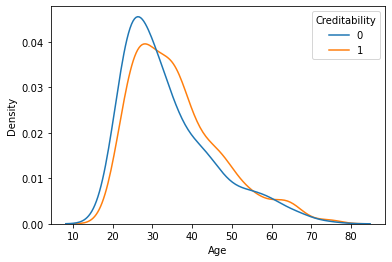

In [175]:
sns.kdeplot(x = feature, data = credit, hue = target,
           common_norm = False) # common_norm = False : 각 그래프 면적 = 1
plt.show()

→ 크로스되는 지점을 봐야한다!

→ Age(나이) 에 따라 Creditability(신용도) 차이가 조금 있다.

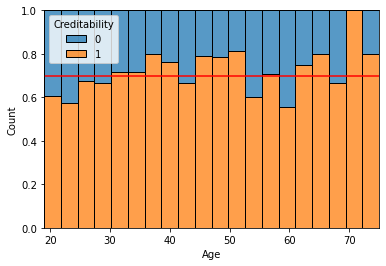

In [177]:
# 율보기 : multiple = 'fill'
sns.histplot(x = feature, data = credit, bins = 20, hue = target,
            multiple = 'fill')
plt.axhline(credit[target].mean(), color = 'r')
plt.show()

2) 수치화 : 로지스틱회귀

- 결측치 확인

In [178]:
credit[feature].isnull().sum()

17

- 결측치 제외

In [179]:
temp = credit.loc[credit[feature].notnull()]
print(temp.head())

   Creditability  AccountBalance  CreditDuration  CreditAmount  Employment  \
0              1               3              24          1249           2   
1              1               2               9           276           3   
2              1               1              18          1049           2   
4              1               3              12          1424           5   
5              1               2              30          1715           3   

   SexMarital  CurrentAddress   Age  
0           4               2  28.0  
1           4               4  22.0  
2           2               4  21.0  
4           2               4  55.0  
5           2               1  26.0  


In [180]:
# 로지스틱 회귀
import statsmodels.api as sm

model = sm.Logit(temp[target], temp[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.609024
         Iterations 5
Age    1.333286e-33
dtype: float64


3) 관계 평가하기

- Age(나이) 에 따라 Creditability(신용도)는 관계 있다. (중간)

#### ② CreditDuration( 신청한 대출기간(월) ) --> Creditability(신용도)

In [181]:
feature = 'CreditDuration'

1) 그래프 : histogram, densityplot

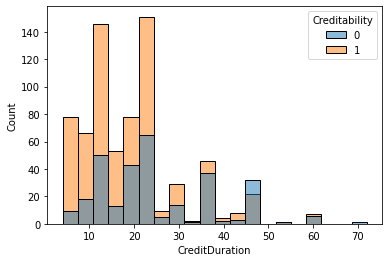

In [182]:
sns.histplot(x=feature, data = credit, hue = target, bins = 20)
plt.show()

-> 나이보다는 관계가 강해보인다.

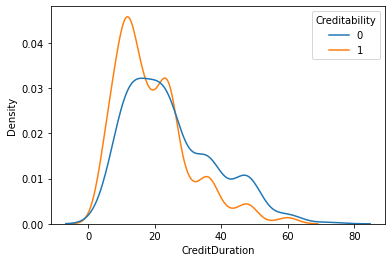

In [183]:
sns.kdeplot(x = feature, data = credit, hue = target,
           common_norm = False)
plt.show()

2) 수치화 : 로지스틱회귀

In [118]:
credit[feature].isna().sum()

0

In [121]:
# 로지스틱 회귀

model = sm.Logit(credit[target], credit[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.661576
         Iterations 4
CreditDuration    1.917447e-14
dtype: float64


3) 관계 평가하기

-> 나이보다는 관계가 강해보인다.

#### ③ CreditAmount(신청한 대출금액) --> Creditability(신용도)

In [185]:
feature = 'CreditAmount'

1) 그래프 : histogram, densityplot

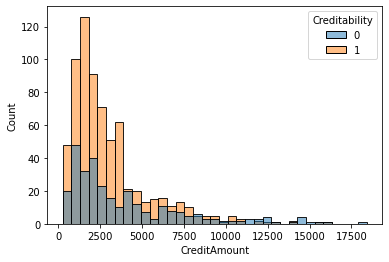

In [186]:
sns.histplot(x = feature, data = credit, hue = target)
plt.show()

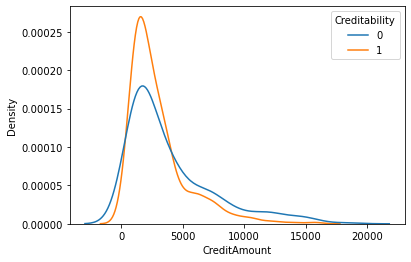

In [187]:
sns.kdeplot(x = feature, data = credit, hue = target,
           common_norm = False)
plt.show()

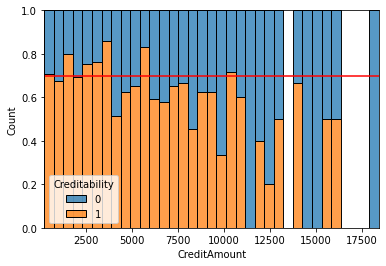

In [189]:
sns.histplot(x = feature, data = credit, hue = target,
            multiple = 'fill')
plt.axhline(credit[target].mean(), color = 'r')
plt.show()

2) 수치화 : 로지스틱회귀

In [126]:
credit[feature].isna().sum()

0

In [190]:
model = sm.Logit(credit[target], credit[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.670231
         Iterations 4
CreditAmount    1.236971e-10
dtype: float64


3) 관계 평가하기

-> 관계가 있다.

### (2) 범주형 X --> 범주형 Y

* 교차표(pd.crosstab())
* 시각화( Stacked Bar, Mosaic)
* 가설검정(카이제곱검정)
* 관계 평가

#### ① AccountBalance(은행잔고) --> Creditability(신용도)

In [191]:
feature = 'AccountBalance'

1) 교차표(pd.crosstab())

In [192]:
pd.crosstab(credit[target], credit[feature],
            normalize = 'columns')

AccountBalance,1,2,3
Creditability,,,
0,0.492701,0.390335,0.131291
1,0.507299,0.609665,0.868709


2) 시각화( Stacked Bar, Mosaic)

Creditability          0         1
AccountBalance                    
1               0.492701  0.507299
2               0.390335  0.609665
3               0.131291  0.868709


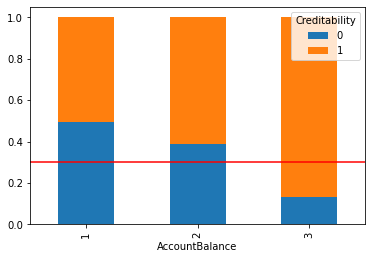

In [193]:
temp = pd.crosstab(credit[feature], credit[target], 
                   normalize = 'index')
print(temp)

temp.plot.bar(stacked=True)
plt.axhline(1-credit[target].mean(), color = 'r')
plt.show()

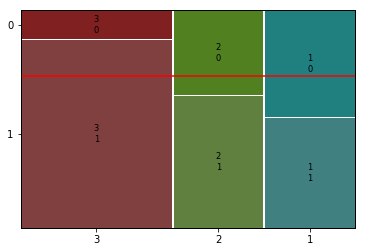

In [195]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(credit, [feature, target])
plt.axhline(credit[target].mean(), color = 'r')
plt.show()

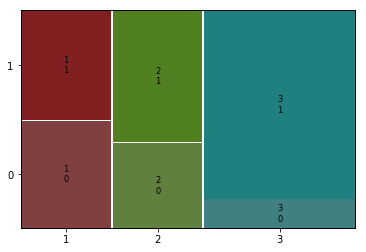

In [196]:
# mosaic plot 범주 정렬해서 보기
temp = credit.copy()
temp = temp.sort_values([feature, target])
mosaic(temp, [feature, target])
plt.show()

3) 가설검정(카이제곱검정)

In [197]:
# 집계
table = pd.crosstab(credit[target], credit[feature])
table

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량:', result[0])
print('p-value:', result[1])
print('자유도:', result[2])
print('기대빈도:\n', result[3])

카이제곱통계량: 120.84376361168343
p-value: 5.7426208775458905e-27
자유도: 2
기대빈도:
 [[ 82.2  80.7 137.1]
 [191.8 188.3 319.9]]


4) 관계 평가하기

- 눈으로 봐도 관계가 크고 p-value를 봐도 그렇다 (관곅가 크다)

#### ② Employment(현 직업 근무 기간) --> Creditability(신용도)

In [198]:
feature = 'Employment'

1) 교차표(pd.crosstab())

In [199]:
pd.crosstab(credit[target], credit[feature],
            normalize = 'columns')

Employment,1,2,3,4,5
Creditability,,,,,
0,0.370968,0.406977,0.306785,0.224138,0.252964
1,0.629032,0.593023,0.693215,0.775862,0.747036


2) 시각화( Stacked Bar, Mosaic)

Creditability         0         1
Employment                       
1              0.370968  0.629032
2              0.406977  0.593023
3              0.306785  0.693215
4              0.224138  0.775862
5              0.252964  0.747036


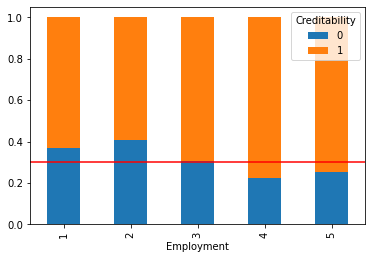

In [201]:
temp = pd.crosstab(credit[feature], credit[target], 
                   normalize = 'index')
print(temp)

temp.plot.bar(stacked=True)
plt.axhline(1-credit[target].mean(), color = 'r')
plt.show()

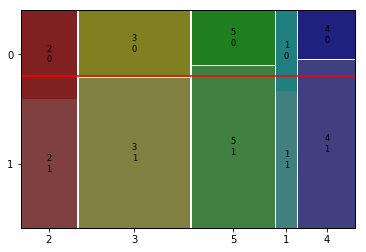

In [203]:
mosaic(credit, [feature, target])
plt.axhline(credit[target].mean(), color = 'r')
plt.show()

3) 가설검정(카이제곱검정)

In [204]:
# 집계
table = pd.crosstab(credit[target], credit[feature])
table

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량:', result[0])
print('p-value:', result[1])
print('자유도:', result[2])
print('기대빈도:\n', result[3])

카이제곱통계량: 18.3682738466968
p-value: 0.001045452349140254
자유도: 4
기대빈도:
 [[ 18.6  51.6 101.7  52.2  75.9]
 [ 43.4 120.4 237.3 121.8 177.1]]


4) 관계 평가하기

- 관계가 어느정도 있다.(중간 관계)

#### ③ SexMarital(성별 & 결혼상태) --> Creditability(신용도)

In [205]:
feature = 'SexMarital'

1) 교차표(pd.crosstab())

In [206]:
pd.crosstab(credit[target], credit[feature],
            normalize = 'columns')

SexMarital,1,2,3,4
Creditability,,,,
0,0.4,0.351613,0.266423,0.271739
1,0.6,0.648387,0.733577,0.728261


2) 시각화( Stacked Bar, Mosaic)

Creditability         0         1
SexMarital                       
1              0.400000  0.600000
2              0.351613  0.648387
3              0.266423  0.733577
4              0.271739  0.728261


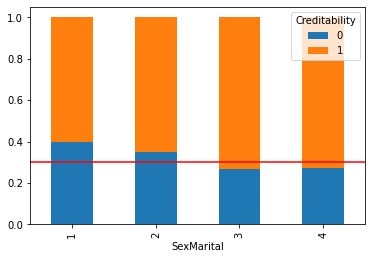

In [208]:
temp = pd.crosstab(credit[feature], credit[target], 
                   normalize = 'index')
print(temp)

temp.plot.bar(stacked=True)
plt.axhline(1-credit[target].mean(), color = 'r')
plt.show()

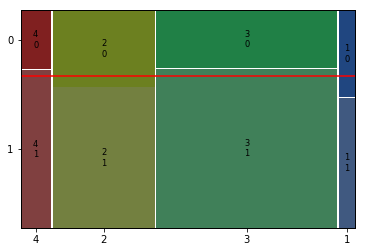

In [209]:
mosaic(credit, [feature, target])
plt.axhline(credit[target].mean(), color = 'r')
plt.show()

3) 가설검정(카이제곱검정)

In [210]:
# 집계
table = pd.crosstab(credit[target], credit[feature])
table

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량:', result[0])
print('p-value:', result[1])
print('자유도:', result[2])
print('기대빈도:\n', result[3])

카이제곱통계량: 9.60521395933605
p-value: 0.02223800546926877
자유도: 3
기대빈도:
 [[ 15.   93.  164.4  27.6]
 [ 35.  217.  383.6  64.4]]


#### ④ CurrentAddress(현 거주지 거주기간) --> Creditability(신용도)

In [211]:
feature = 'CurrentAddress'

1) 교차표(pd.crosstab())

In [212]:
pd.crosstab(credit[target], credit[feature],
            normalize = 'columns')

CurrentAddress,1,2,3,4
Creditability,,,,
0,0.276923,0.314935,0.288591,0.300242
1,0.723077,0.685065,0.711409,0.699758


2) 시각화( Stacked Bar, Mosaic)

Creditability          0         1
CurrentAddress                    
1               0.276923  0.723077
2               0.314935  0.685065
3               0.288591  0.711409
4               0.300242  0.699758


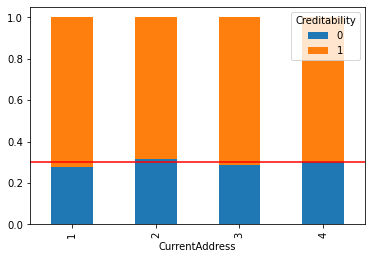

In [214]:
temp = pd.crosstab(credit[feature], credit[target], 
                   normalize = 'index')
print(temp)

temp.plot.bar(stacked=True)
plt.axhline(1-credit[target].mean(), color = 'r')
plt.show()

3) 가설검정(카이제곱검정)

In [215]:
# 집계
table = pd.crosstab(credit[target], credit[feature])
table

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량:', result[0])
print('p-value:', result[1])
print('자유도:', result[2])
print('기대빈도:\n', result[3])

카이제곱통계량: 0.7492964483880513
p-value: 0.8615521320413175
자유도: 3
기대빈도:
 [[ 39.   92.4  44.7 123.9]
 [ 91.  215.6 104.3 289.1]]


4) 관계 평가하기

- 관계 없다.